In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [6]:
# looking at some of the data
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [7]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [8]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [9]:
num_topics, num_top_words = 6, 8

# Stop words, stemming, lemmatization
Stop words

Some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words.

The general trend in IR systems over time has been from standard use of quite large stop lists (200-300 terms) to very small stop lists (7-12 terms) to no stop list whatsoever. Web search engines generally do not use stop lists.

In [14]:
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

## There is no single universal list of stop words!


# Stemming and Lemmatization
from Information Retrieval textbook:

Are the below words the same?

organize, organizes, and organizing

democracy, democratic, and democratization

Stemming and Lemmatization both generate the root form of the words.

Lemmatization uses the rules about a language. The resulting tokens are all actual words

"Stemming is the poor-man’s lemmatization." (Noah Smith, 2011) Stemming is a crude heuristic that chops the ends off of words. The resulting tokens may not be actual words. Stemming is faster.

In [15]:
import nltk 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomasresendiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk import stem

In [17]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [18]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [19]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [20]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [22]:
fly_list = ['fly', 'flies', 'flying']
org_list = ['organize', 'organizes', 'organizing']
uni_list = ['universe', 'university']

In [27]:
print("Original List: ", fly_list)
print("Lemmatized: ", [wnl.lemmatize(word) for word in fly_list])
print("Porter: ", [porter.stem(word) for word in fly_list])

Original List:  ['fly', 'flies', 'flying']
Lemmatized:  ['fly', 'fly', 'flying']
Porter:  ['fli', 'fli', 'fli']


In [29]:
print("Original List: ", org_list)
print("Lemmatized: ", [wnl.lemmatize(word) for word in org_list])
print("Porter: ", [porter.stem(word) for word in org_list])

Original List:  ['organize', 'organizes', 'organizing']
Lemmatized:  ['organize', 'organizes', 'organizing']
Porter:  ['organ', 'organ', 'organ']


In [28]:
print("Original List: ", uni_list)
print("Lemmatized: ", [wnl.lemmatize(word) for word in uni_list])
print("Porter: ", [porter.stem(word) for word in uni_list])

Original List:  ['universe', 'university']
Lemmatized:  ['universe', 'university']
Porter:  ['univers', 'univers']


Stemming and lemmatization are language dependent. Languages with more complex morphologies may show bigger benefits. For example, Sanskrit has a very large number of verb forms.



In [32]:
import spacy

In [39]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
lookups = Lookups()
lemmatizer = Lemmatizer(lookups)

In [43]:
print("Original List: ", word_list)
print("Spacy Lemm: ", [lemmatizer.lookup(word) for word in word_list])

Original List:  ['feet', 'foot', 'foots', 'footing']
Spacy Lemm:  ['feet', 'foot', 'foots', 'footing']


Spacy doesn't offer a stemmer (since lemmatization is considered better)

Stop words vary from library to library

In [49]:
nlp = spacy.load("en")

In [54]:
# find the differences between spacy and sklearn stop word list
spacy_stop_words = set(list(nlp.Defaults.stop_words))
sklearn_stop_words = set(list(stop_words.ENGLISH_STOP_WORDS))

In [60]:
diff = spacy_stop_words - sklearn_stop_words
print(list(diff))

["'s", '‘re', 'used', 'quite', 'n‘t', '’m', '‘m', 'doing', "'ve", 'using', 'unless', 'does', 'regarding', 'make', 'say', "'d", "n't", 'ca', 'n’t', '‘d', "'ll", '’re', 'just', '’d', '‘ve', '’ll', "'re", 'really', '’s', '‘ll', 'various', '‘s', 'did', "'m", '’ve']


In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [62]:
vectorizer = CountVectorizer(stop_words='english')#, tokenizer=LemmaTokenizer())

In [64]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [65]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [67]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(26576,)

In [68]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

# Singular Value Decomposition (SVD)
"SVD is not nearly as famous as it should be." - Gilbert Strang

We would clearly expect that the words that appear most frequently in one topic would appear less frequently in the other - otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, we expect the topics to be orthogonal.

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

https://research.fb.com/fast-randomized-svd/

<img src="images/svd_fb.png">

SVD is an exact decomposition, since the matrices it creates are big enough to fully cover the original matrix. SVD is extremely widely used in linear algebra, and specifically in data science, including:<br><br>
semantic analysis<br>
collaborative filtering/recommendations (winning entry for Netflix Prize)<br>
calculate Moore-Penrose pseudoinverse<br>
data compression<br>
principal component analysis<br><br>
Latent Semantic Analysis (LSA) uses SVD. You will sometimes hear topic modelling referred to as LSA.

In [69]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 52s, sys: 4.43 s, total: 1min 56s
Wall time: 21.3 s


In [70]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [73]:
# to confirm that U, s, Vh is a decomposition of vectors
reconstructed_vectors = U @ np.diag(s) @ Vh
np.allclose(reconstructed_vectors, vectors)

True

In [75]:
# another way of doing it is:
# np.linalg.norm(reconstructed_vectors - vectors)

In [78]:
# to confirm that U, Vh are orthnormal
# np.allclose : Returns True if two arrays are element-wise equal within a tolerance.
np.allclose(U.T @ U, np.eye(U.shape[0]))
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))
# We take the transpose of U and multiply it by U and the same for Vh and Vh transponse
# With U its the columns that are orthonormal, with Vh its the rows that are orthonormal

True

### What can we say about the singular values s?

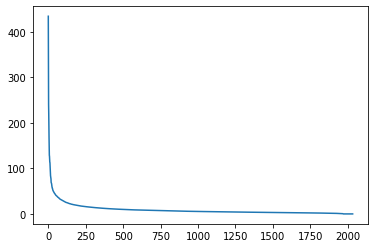

In [80]:
plt.plot(s) # they are non-negative and they are decreasing
plt.show()

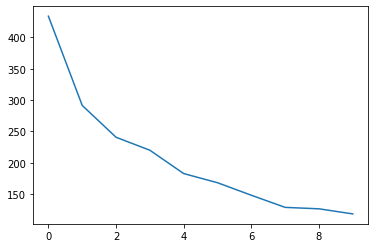

In [82]:
plt.plot(s[:10])
plt.show()

In [83]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [84]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

We get topics that match the kinds of clusters we would expect! This is despite the fact that this is an unsupervised algorithm - which is to say, we never actually told the algorithm how our documents are grouped.

We will return to SVD in much more detail later. For now, the important takeaway is that we have a tool that allows us to exactly factor a matrix into orthogonal columns and orthogonal rows.

## Non-negative Matrix Factorization (NMF)
Is a different matrix factorization.  If you are doing topic modeling you would either use SVD or NMF

<img src="images/face_pca.png">